# Zonal mean response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [2]:
from lib.util import year_shift
import xlearn

%matplotlib notebook

In [3]:
# data
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

volcs = ['Agung', 'StMaria', 'Pinatubo']
years = [1963, 1902, 1991]

# non-nudged
datanames = ('t_surf', 'precip')
for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).mean('lon')
            das[key] = da

    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).mean('lon')
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

# nudged
datanames = ('netrad_toa',)
for dataname in datanames:
    # volc_nudge
    ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_nudge_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).mean('lon')
            das[key] = da

    # ctl_nudge
    ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_nudge_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).mean('lon')
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da


	[Exists]: Agung_t_surf
	[Exists]: StMaria_t_surf
	[Exists]: Pinatubo_t_surf
Agung_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf
Pinatubo_ctl_t_surf
Agung_precip
StMaria_precip
Pinatubo_precip
Agung_ctl_precip
StMaria_ctl_precip
Pinatubo_ctl_precip
Agung_nudge_netrad_toa
StMaria_nudge_netrad_toa
Pinatubo_nudge_netrad_toa
Agung_nudge_ctl_netrad_toa
StMaria_nudge_ctl_netrad_toa
Pinatubo_nudge_ctl_netrad_toa


<IPython.core.display.Javascript object>


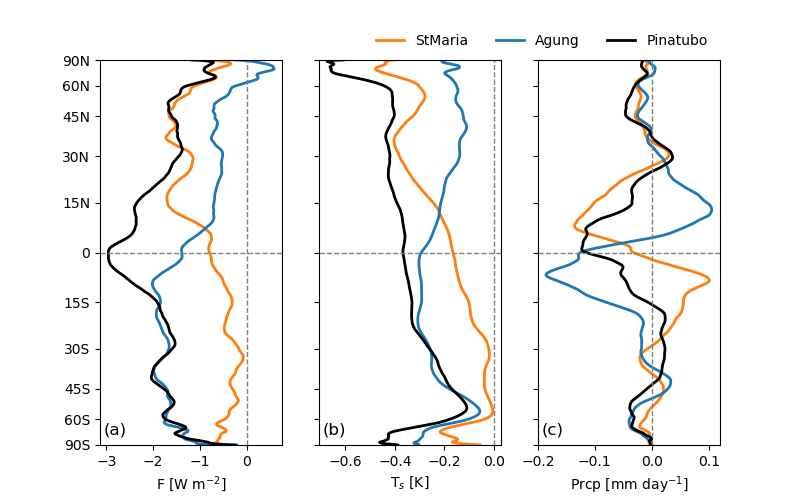

In [69]:
# fig
fig, axes = plt.subplots(1, 3, figsize=(8,5), sharey=True)
n_years = 3
volc_dates = dict(StMaria=(1902, 10), Agung=(1963, 3), Pinatubo=(1991, 6))
ylim = (-1, 1)
yticks = [-1, -np.sin(np.pi/3), -np.sin(np.pi/4), -.5, -np.sin(np.pi/12),
          0, np.sin(np.pi/12), .5, np.sin(np.pi/4), np.sin(np.pi/3), 1]
yticklabels = ['90S', '60S', '45S', '30S', '15S', '0', '15N', '30N', '45N', '60N', '90N']
rolling_kws = dict(lat=9, center=True, min_periods=1)
axline_kws = dict(color='gray', lw=1, ls='--')
legend_kws = dict(loc='upper right', bbox_to_anchor=(1,1.1), ncol=3)
tag_kws = dict(x=.02, y=.02, ha='left', va='bottom', fontsize='large')

ax = axes[0]
dataname = 'netrad_toa'
units = 'W m$^{-2}$'
longname = 'F'

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

ax.set_ylim(ylim)
ax.set_xlabel(f'{longname} [{units}]')
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.text(s='(a)', transform=ax.transAxes, **tag_kws)

# 
ax = axes[1]
dataname = 't_surf'
units = 'K'
longname = 'T$_s$'

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.set_xlabel(f'{longname} [{units}]')
ax.text(s='(b)', transform=ax.transAxes, **tag_kws)


# 
ax = axes[2]
dataname = 'precip'
units = 'mm day$^{-1}$'
longname = 'Prcp'
scale = 24*3600

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(da, np.sin(da.lat/180*np.pi), **line_kws, label=volc)


ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.set_xlabel(f'{longname} [{units}]')
ax.legend(**legend_kws)
ax.text(s='(c)', transform=ax.transAxes, **tag_kws)

figname = 'figs/fig_lines_zonmean_ylat.pdf'
plt.savefig(figname)

<IPython.core.display.Javascript object>


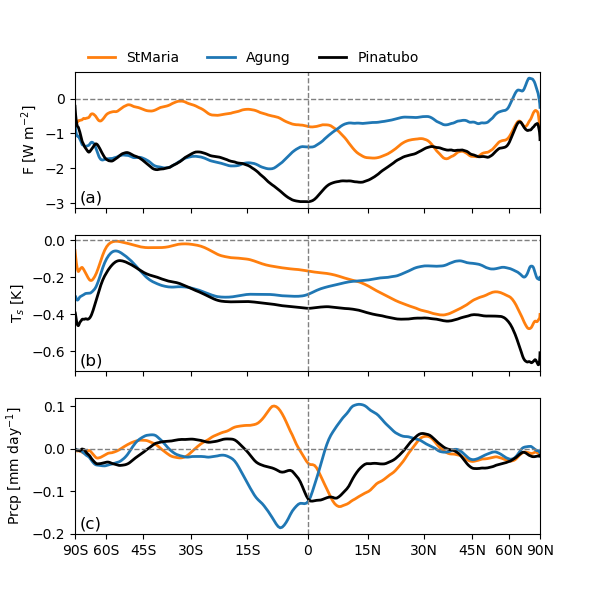

In [70]:
# fig
fig, axes = plt.subplots(3, 1, figsize=(6,6), sharex=True)
n_years = 3
volc_dates = dict(StMaria=(1902, 10), Agung=(1963, 3), Pinatubo=(1991, 6))
xlim = (-1, 1)
xticks = [-1, -np.sin(np.pi/3), -np.sin(np.pi/4), -.5, -np.sin(np.pi/12),
          0, np.sin(np.pi/12), .5, np.sin(np.pi/4), np.sin(np.pi/3), 1]
xticklabels = ['90S', '60S', '45S', '30S', '15S', '0', '15N', '30N', '45N', '60N', '90N']
rolling_kws = dict(lat=9, center=True, min_periods=1)
axline_kws = dict(color='gray', lw=1, ls='--')
legend_kws = dict(loc='upper left', bbox_to_anchor=(0,1.25), ncol=3)
tag_kws = dict(x=.01, y=.02, ha='left', va='bottom', fontsize='large')

ax = axes[0]
dataname = 'netrad_toa'
units = 'W m$^{-2}$'
longname = 'F'

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

ax.set_xlim(xlim)
ax.set_ylabel(f'{longname} [{units}]')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.text(s='(a)', transform=ax.transAxes, **tag_kws)
ax.legend(**legend_kws)


# 
ax = axes[1]
dataname = 't_surf'
units = 'K'
longname = 'T$_s$'

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.set_ylabel(f'{longname} [{units}]')
ax.text(s='(b)', transform=ax.transAxes, **tag_kws)


# 
ax = axes[2]
dataname = 'precip'
units = 'mm day$^{-1}$'
longname = 'Prcp'
scale = 24*3600

volc = 'StMaria'
line_kws = dict(color='C1')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Agung'
line_kws = dict(color='C0')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)

volc = 'Pinatubo'
line_kws = dict(color='k')
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
yyyy, mm = volc_dates[volc]
da = (da.isel(time=slice(mm - 1, mm - 1 + n_years*12))
      .mean(['en', 'time'])
      .rolling(**rolling_kws).mean()*scale
)
ax.plot(np.sin(da.lat/180*np.pi), da, **line_kws, label=volc)


ax.axhline(0, **axline_kws)
ax.axvline(0, **axline_kws)
ax.set_ylabel(f'{longname} [{units}]')
ax.text(s='(c)', transform=ax.transAxes, **tag_kws)

figname = 'figs/fig_lines_zonmean.pdf'
plt.savefig(figname)